In [12]:
%load_ext autoreload
%autoreload 2

import os
import json
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import ray_results_interpreter as rri
import subprocess
import concurrent.futures
from main_run import MainRun

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
def custom_data_filler(out_row, reference_row):
    out_row['path'] = reference_row['path']

def make_table():
    vanilla_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/vanilla',
    }
    symmetry_aware_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware',
    }
    gnn_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/GNN',
    }
    just_in_time_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/just_in_time',
    }
    symmetry_aware_decentralized_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware_decentralized',
    }
    vanilla_normalized_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/vanilla_normalized',
    }
    symmetry_aware_normalized_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware_normalized',
    }
    gnn_normalized_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/GNN_normalized',
    }
    symmetry_aware_decentralized_normalized_paths = {
        1: '/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware_decentralized_normalized',
    }

    sort_by = 'dev_loss'
    pick_row_from_run_by = 'dev_loss'
    results_interpretor = rri.RayResultsinterpreter()
    df_vanilla = results_interpretor.make_table(vanilla_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware = results_interpretor.make_table(symmetry_aware_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_gnn = results_interpretor.make_table(gnn_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_just_in_time = results_interpretor.make_table(just_in_time_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler)
    df_symmetry_aware_decentralized = results_interpretor.make_table(symmetry_aware_decentralized_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_vanilla_normalized = results_interpretor.make_table(vanilla_normalized_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_normalized = results_interpretor.make_table(symmetry_aware_normalized_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_gnn_normalized = results_interpretor.make_table(gnn_normalized_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_decentralized_normalized = results_interpretor.make_table(symmetry_aware_decentralized_normalized_paths, {'store_underage_cost': [4, 6, 9, 13]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    
    df_vanilla.insert(1, 'Architecture Class', "Vanilla")
    df_symmetry_aware.insert(1, 'Architecture Class', "Symmetry Aware")
    df_gnn.insert(1, 'Architecture Class', "GNN")
    df_just_in_time.insert(1, 'Architecture Class', "Oracle")
    df_symmetry_aware_decentralized.insert(1, 'Architecture Class', "Symmetry Aware Decentralized")
    df_vanilla_normalized.insert(1, 'Architecture Class', "Vanilla Normalized")
    df_symmetry_aware_normalized.insert(1, 'Architecture Class', "Symmetry Aware Normalized")
    df_gnn_normalized.insert(1, 'Architecture Class', "GNN Normalized")
    df_symmetry_aware_decentralized_normalized.insert(1, 'Architecture Class', "Symmetry Aware Decentralized Normalized")

    df_vanilla.insert(1, 'hyperparam_name', "data_driven_net_real_fixed_stores")
    df_symmetry_aware.insert(1, 'hyperparam_name', "symmetry_aware_real_fixed_stores")
    df_gnn.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores")
    df_just_in_time.insert(1, 'hyperparam_name', "just_in_time_real_fixed_stores")  
    df_symmetry_aware_decentralized.insert(1, 'hyperparam_name', "symmetry_aware_decentralized_real_fixed_stores")
    df_vanilla_normalized.insert(1, 'hyperparam_name', "data_driven_net_real_fixed_stores_normalized")
    df_symmetry_aware_normalized.insert(1, 'hyperparam_name', "symmetry_aware_real_fixed_stores_normalized")
    df_gnn_normalized.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores_normalized")
    df_symmetry_aware_decentralized_normalized.insert(1, 'hyperparam_name', "symmetry_aware_decentralized_real_fixed_stores_normalized")
    
    df_vanilla.insert(1, 'NN_name', "data_driven")
    df_symmetry_aware.insert(1, 'NN_name', "symmetry_aware_real_data")
    df_gnn.insert(1, 'NN_name', "symmetry_GNN_real_data")
    df_just_in_time.insert(1, 'NN_name', "just_in_time")
    df_symmetry_aware_decentralized.insert(1, 'NN_name', "symmetry_aware_real_data")
    df_vanilla_normalized.insert(1, 'NN_name', "data_driven")
    df_symmetry_aware_normalized.insert(1, 'NN_name', "symmetry_aware_real_data")
    df_gnn_normalized.insert(1, 'NN_name', "symmetry_GNN_real_data")
    df_symmetry_aware_decentralized_normalized.insert(1, 'NN_name', "symmetry_aware_real_data")
    
    # df = pd.concat([df_vanilla, df_symmetry_aware, df_gnn, df_just_in_time, df_symmetry_aware_decentralized,
    #                 df_vanilla_normalized, df_symmetry_aware_normalized, df_gnn_normalized, df_symmetry_aware_decentralized_normalized])
    df = pd.concat([df_vanilla, df_symmetry_aware, df_gnn, df_just_in_time, df_symmetry_aware_decentralized])
    # df = pd.concat([df_vanilla, df_symmetry_aware, df_gnn, df_just_in_time, df_symmetry_aware_decentralized])
    min_test_loss = df.groupby(['store_underage_cost'])['Test Loss'].transform('min')
    df['Test Gap %'] = -((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
    df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
    df.drop(columns=['# of stores', '# of runs'], inplace=True)
    df.sort_values(by=['store_underage_cost', 'Architecture Class'], inplace=True)
    cols = df.columns.tolist()
    cols.remove('store_underage_cost')
    cols = ['store_underage_cost'] + cols
    df = df[cols]
    return df

In [14]:
def collect_data_and_plot(df, test_mode, setting_name, x_axis_value):
    def run_main_run(row):
        try:
            cmd = [
                "/user/ml4723/.conda/envs/neural_inventory_control/bin/python",
                "main_run.py",
                test_mode, # test or test_on_dev
                setting_name,
                row['hyperparam_name'],
                row['path']
            ]
            env = {
                **os.environ,
                "MKL_THREADING_LAYER": "GNU",
                "MKL_SERVICE_FORCE_INTEL": "1"
            }
            subprocess.run(cmd, capture_output=True, text=True, check=True, env=env, cwd="/user/ml4723/Prj/NIC/")
        except subprocess.CalledProcessError as e:
            print(f"Error running main_run.py for path {row['path']}: {e}")
            print(f"Error output: {e.stderr}")
        except Exception as e:
            print(f"Unexpected error running main_run.py for path {row['path']}: {e}")

    def get_file_name(row):
        normalized = 'Normalized' in row['Architecture Class']
        decentralized = 'Decentralized' in row['Architecture Class']
        return f"results/one_warehouse_real/{row['NN_name']}_{normalized}_{decentralized}/{row['store_underage_cost']}.csv"
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        futures = []
        for _, row in df.iterrows():
            file_name = get_file_name(row)
            if os.path.exists(file_name):
                continue
            while len(futures) >= 32:
                done, not_done = concurrent.futures.wait(
                    futures, 
                    return_when=concurrent.futures.FIRST_COMPLETED
                )
                futures = list(not_done)
            futures.append(executor.submit(run_main_run, row))
        concurrent.futures.wait(futures)
    
    avg_s_underage = []
    avg_s_holding = []
    avg_w_holding = []
    avg_profit = []
    for _, row in df.iterrows():
        file_name = get_file_name(row)
        data = pd.read_csv(file_name)
        n_samples = 416
        batch_size = 416
        num_batches = n_samples // batch_size
        num_steps = 25
        start_step = 16
        n_stores = 16
        
        relevant_indices = []
        for batch in range(num_batches):
            batch_start = batch * batch_size * num_steps
            step_start = batch_start + start_step * batch_size
            step_end = batch_start + num_steps * batch_size
            relevant_indices.extend(range(step_start, step_end))
        
        relevant_data = data.iloc[relevant_indices]
        
        avg_s_underage.append(-relevant_data['s_underage_costs'].mean() / row['store_underage_cost'])
        avg_s_holding.append(relevant_data['s_holding_costs'].mean() / row['store_underage_cost'])
        avg_w_holding.append(relevant_data['w_holding_costs'].mean() / row['store_underage_cost'])
        avg_profit.append(-relevant_data['s_underage_costs'].sum() * n_stores - relevant_data['s_holding_costs'].sum() * n_stores - relevant_data['w_holding_costs'].sum())

    df['avg_s_underage'] = avg_s_underage
    df['avg_s_holding'] = avg_s_holding
    df['avg_w_holding'] = avg_w_holding
    df['avg_profit'] = avg_profit

    # Calculate relative profit
    oracle_profits = df[df['Architecture Class'] == 'Oracle'].set_index('store_underage_cost')['avg_profit']
    df['relative_profit'] = df.apply(lambda row: (row['avg_profit'] / oracle_profits[row['store_underage_cost']]) * 100, axis=1)

    plot_data = df.pivot(index=x_axis_value, columns='Architecture Class', 
                         values=['relative_profit', 'avg_s_underage', 'avg_s_holding', 'avg_w_holding'])
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration
    titles = ['Profit % relative to Oracle', 'Store Revenue / (average unit underage cost)', 'Store Holding Cost / (average unit underage cost)', 'Warehouse Holding Cost / (average unit underage cost)']
    y_values = ['relative_profit', 'avg_s_underage', 'avg_s_holding', 'avg_w_holding']

    if x_axis_value == 'store_underage_cost':
        x_values = [4, 6, 9, 13]
    color_map = {
        'Vanilla': 'C0',
        'Symmetry Aware': 'C1',
        'GNN': 'C2',
        'Oracle': 'C3',
        'Symmetry Aware Decentralized': 'C4',
        'Vanilla Normalized': 'C0',
        'Symmetry Aware Normalized': 'C1',
        'GNN Normalized': 'C2',
        'Symmetry Aware Decentralized Normalized': 'C4',
    }

    linestyle_map = {
        'Vanilla': '-',
        'Symmetry Aware': '-',
        'GNN': '-',
        'Oracle': '-',
        'Symmetry Aware Decentralized': '-',
        'Vanilla Normalized': '--',
        'Symmetry Aware Normalized': '--',
        'GNN Normalized': '--',
        'Symmetry Aware Decentralized Normalized': '--',
    }

    for i, (ax, title, y_value) in enumerate(zip(axes, titles, y_values)):
        for arch in df['Architecture Class'].unique():
            if arch in plot_data[y_value].columns:
                ax.plot(x_values, plot_data[y_value][arch].loc[x_values], marker='o', label=f'{arch}', 
                        color=color_map[arch], linestyle=linestyle_map[arch])
        
        ax.set_xlabel('Average unit underage cost')
        ax.set_ylabel(f'{title}')
        ax.set_title(title)
        ax.legend()
        ax.grid(True)
        ax.set_xticks(x_values)
        ax.set_xticklabels(x_values)
    
    plt.tight_layout()
    plt.show()
    return df


In [15]:
df = make_table()

In [16]:
# Print the 'path' column, showing only the last part of the path
for path in df['path']:
    print(path)

/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/GNN/run_2024-09-29_02-37-53/run_5b14d_00018_18_context=256,learning_rate=0.0100,samples=7,store_underage_cost=4,training_n_samples=416_2024-09-29_02-37-54
/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/just_in_time/run_2024-09-29_03-47-37/run_18ba7_00000_0_samples=1,store_underage_cost=4_2024-09-29_03-47-37
/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware/run_2024-09-29_02-37-19/run_46a12_00004_4_context=256,learning_rate=0.0010,samples=2,store_underage_cost=4,training_n_samples=416_2024-09-29_02-37-19
/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware_decentralized/run_2024-09-29_02-37-35/run_506e3_00003_3_context=0,learning_rate=0.0100,samples=2,store_underage_cost=4,training_n_samples=416_2024-09-29_02-37-36
/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/vanilla/run_2024-09-29_02-37-30/run_4d52f_00029_29_learning_rate=0.0001,master=128,samples=

In [17]:
df

,store_underage_cost,NN_name,hyperparam_name,Architecture Class,Learning Rate,Train Loss,Dev Loss,Test Loss,Test Gap %,path
0,4,symmetry_GNN_real_data,symmetry_GNN_real_fixed_stores,GNN,0.0100,-171.370241,-160.561805,-147.128502,30.627958,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
0,4,just_in_time,just_in_time_real_fixed_stores,Oracle,NaN,-233.863972,-221.125507,-212.086163,0.000000,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
0,4,symmetry_aware_real_data,symmetry_aware_real_fixed_stores,Symmetry Aware,0.0010,-177.619705,-163.405198,-150.448627,29.062497,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
0,4,symmetry_aware_real_data,symmetry_aware_decentralized_real_fixed_stores,Symmetry Aware Decentralized,0.0100,-114.522902,-130.280367,-119.884644,43.473614,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
0,4,data_driven,data_driven_net_real_fixed_stores,Vanilla,0.0001,-179.287909,-170.170711,-155.563730,26.650693,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
1,6,symmetry_GNN_real_data,symmetry_GNN_real_fixed_stores,GNN,0.0001,-273.479340,-254.174110,-220.614502,30.653055,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
1,6,just_in_time,just_in_time_real_fixed_stores,Oracle,NaN,-350.798402,-331.688289,-318.131535,0.000000,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
1,6,symmetry_aware_real_data,symmetry_aware_real_fixed_stores,Symmetry Aware,0.0010,-281.441203,-259.965032,-225.055908,29.256964,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
1,6,symmetry_aware_real_data,symmetry_aware_decentralized_real_fixed_stores,Symmetry Aware Decentralized,0.0100,-266.915362,-250.886230,-217.774489,31.545771,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...
1,6,data_driven,data_driven_net_real_fixed_stores,Vanilla,0.0001,-284.087805,-269.240234,-247.399733,22.233509,/user/ml4723/Prj/NIC/ray_results/warehouse_rea...


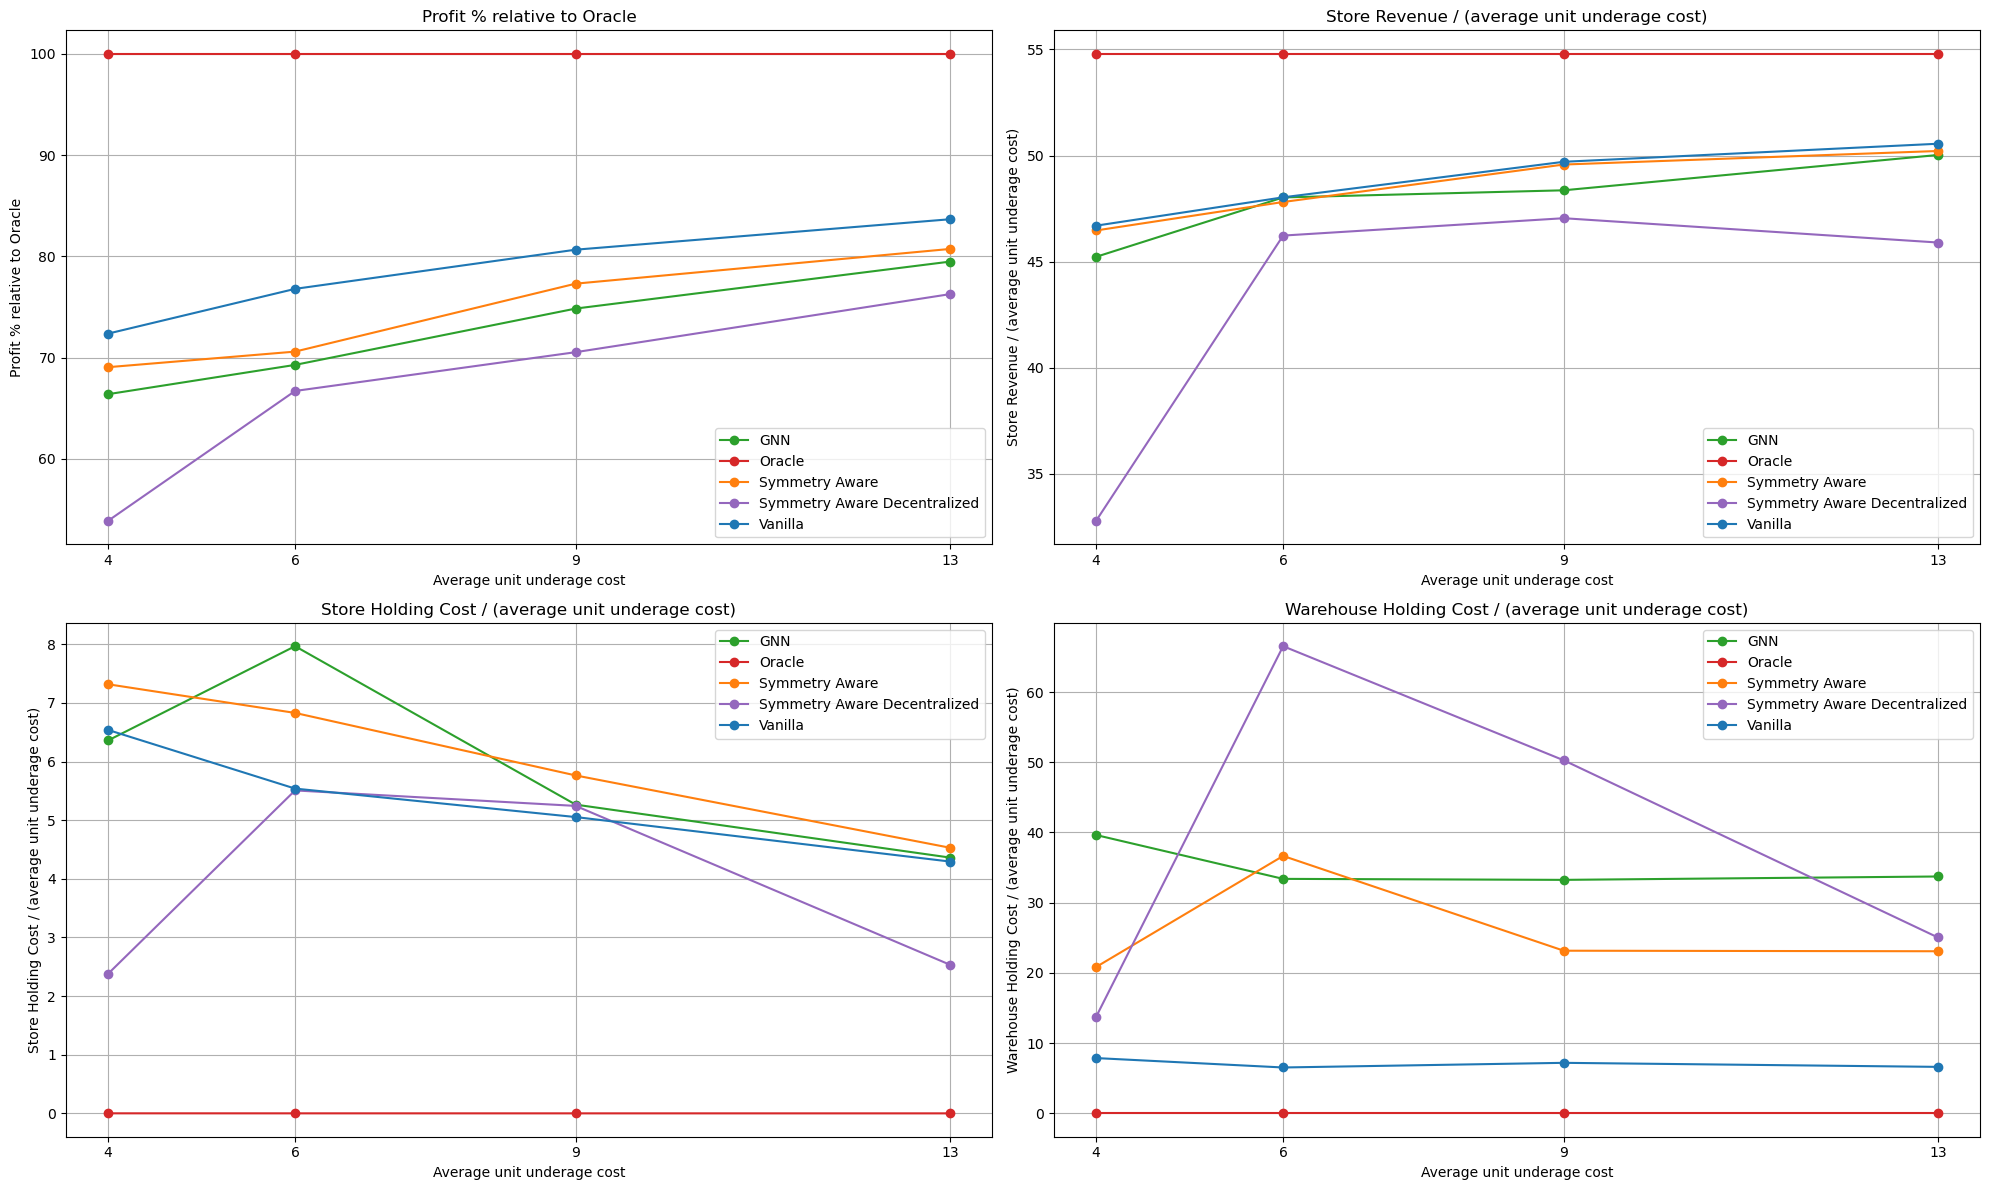

In [18]:
df_t = collect_data_and_plot(df, "test", "one_warehouse_real_lost_demand_fixed_stores", "store_underage_cost")

In [55]:
df_t.drop(columns=['path', 'NN_name', 'hyperparam_name', 'Learning Rate'], inplace=True)

In [56]:
print(df_t.to_string())

   store_underage_cost                       Architecture Class  Train Loss    Dev Loss   Test Loss  Test Gap %  avg_s_underage  avg_s_holding  avg_w_holding    avg_profit  relative_profit
0                    4                                      GNN -175.404871 -164.655499  -85.435363   57.864599       48.442519      20.892461      99.059377  5.117921e+06        42.135413
0                    4                           GNN Normalized -175.716592 -167.029581    9.183345  104.529084       48.313868      13.226733     598.127545 -5.501192e+05        -4.529084
0                    4                                   Oracle -233.280130 -223.605101 -202.763856    0.000000       50.692152       0.001188       0.000000  1.214637e+07       100.000000
0                    4                           Symmetry Aware -181.005777 -168.978866 -119.754040   40.939158       47.952288      10.009910     128.061925  7.173745e+06        59.060837
0                    4             Symmetry Aware Decen

In [77]:
df

,store_underage_cost,Architecture Class,Train Loss,Dev Loss,Test Loss,Test Gap %,avg_s_underage,avg_s_holding,avg_w_holding,avg_profit
0,4,GNN,-171.822484,-156.620643,-115.101613,43.233663,46.245418,16.458415,16.185861,13.601141
0,4,Oracle,-233.280130,-223.605101,-202.763856,0.000000,50.692152,0.001188,0.000000,50.690963
0,4,Symmetry Aware,-181.235345,-168.182141,-133.438994,34.189950,47.558171,10.182733,64.251020,-26.875582
0,4,Symmetry Aware Decentralized,-171.246490,-156.713191,-94.519122,53.384630,44.570780,5.055220,254.172480,-214.656920
0,4,Vanilla,-179.211457,-169.137754,-155.213492,23.451105,46.970803,7.380502,12.590838,26.999462
1,6,GNN,-277.388412,-260.604801,-174.366720,42.670469,48.738347,18.172674,24.072499,6.493175
1,6,Oracle,-349.923022,-335.408988,-304.148170,0.000000,50.692151,0.000792,0.000000,50.691359
1,6,Symmetry Aware,-285.239210,-266.339810,-196.543336,35.379083,48.874827,9.342029,108.409208,-68.876410
1,6,Symmetry Aware Decentralized,-246.721755,-176.357055,-165.656200,45.534376,29.633230,0.753779,20.321354,8.558096
1,6,Vanilla,-281.532561,-266.810781,-246.348374,19.003828,47.719887,5.987918,10.782479,30.949489
